In [20]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import binom
from scipy.stats import beta

warnings.filterwarnings( 'ignore' )

# Bayesian A/B testing

Suppose we ran an A/B/n test on our website's landing page and randomly (evenly) assign each user to a variation:
- Control - the current version of the website with an orange button
- Variation A - updates the button color to blue
- Variation B - updates the button color to red

We know that the control has a conversion rate of about .05 (i.e. 5%) with a variance of about .025, thus conversions rage from .025 to .075. We think that one of the variations may increase the mean conversion rate by 1-2%.

We're going to calculate our findings on a daily basis until we feel like we have enough evidence to make a decision. 

## Methodology

Let's look at all the key assumptions we need to consider and the calculations we'll need to make each time we want to update our results. 

### Parameters of Interest

The main parameters we want to consider are the conversion rates for each variation. Let's call these:
- $\theta_{c}$ - The true probability that a user will convert on the control
- $\theta_{a}$ - The true probability that a user will convert on variation a
- $\theta_{b}$ - The true probability that a user will convert on variation b

### Likelihood

Because an A/B test can be considered a binomial experiment, we will use a [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) for the likelihood.

The binomial distribution is discrete, but if we plot enough data points we can see that is starts looking a lot like a normal distribution. 

Here is a binomial distribution with a $.2$ probability.

The two plots show the same distribution, but the first plot generates the distribution using random samples, the second one calculates values within a range.

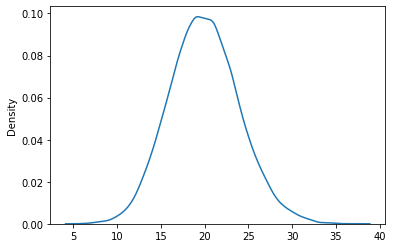

In [2]:
# https://www.w3schools.com/python/numpy_random_binomial.asp
sns.distplot(random.binomial(n=100, p=0.2, size=10000), hist=False, label='binomial')
plt.show()

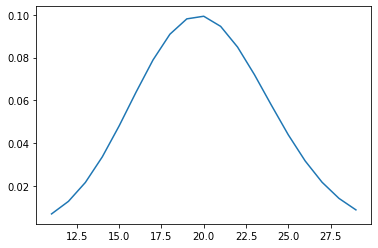

In [19]:
from scipy.stats import binom

n =  100
p = .2
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
y = binom.pmf(x,n,p)
plt.plot(x,y)
plt.show()

### Priors

The [conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior) for a binomial likelihood is a Beta prior.

The Beta distribution is continuous and has an $\alpha$ and $\beta$ parameter. The ratio of $\alpha$ and $\beta$ define the shape of the distribution. Here is a prior of $\alpha=2$ and $\beta=2$.

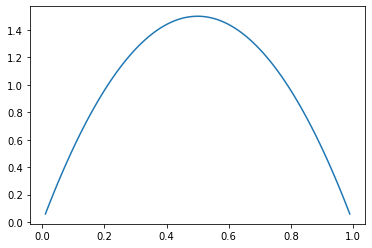

In [22]:
a = 2
b = 2
x = np.arange (0.01, 1, 0.01)
y = beta.pdf(x,a,b)
plt.plot(x,y)
plt.show()

When selecting the prior, we can use our knowledge about the existing website conversion rate. We know that the current website has a conversion rate of 5% and ranges from 0.025 to 0.075. 

We can find a Beta distribution that centers around 5%, but we can keep the width of the distribution broad so that it doesn't inform our outcome too much.

If we go with $\alpha=50$ and $\beta=1000$ it maintains that 5% ratio, but it might be a bit too narrow.

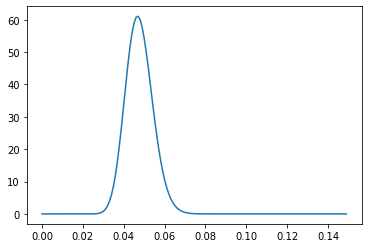

In [36]:
a = 50
b = 1000
x = np.arange (0.0, .15, 0.001)
y = beta.pdf(x,a,b)
plt.plot(x,y)
plt.show()

If we go with $\alpha=5$ and $\beta=100$ it maintains that 5% ratio, but the Beta distribution has a bit of a right skew to it when you use smaller numbers.

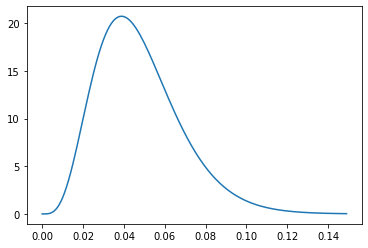

In [38]:
a = 5
b = 100
x = np.arange (0.0, .15, 0.001)
y = beta.pdf(x,a,b)
plt.plot(x,y)
plt.show()

Using even smaller numbers of $\alpha=1$ and $\beta=20$ to maintain the 5% ratio, changes the shape of the Beta distribution altogether. This is a strength of the distribution in that we can shape it to many different forms. But, it gets a little tricker to have a totally normal looking distribution when you're working with smaller parameter values.

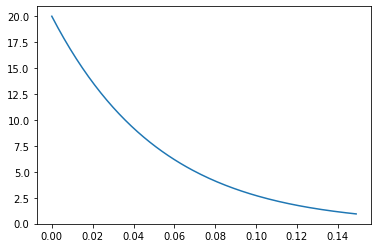

In [39]:
a = 1
b = 20
x = np.arange (0.0, .15, 0.001)
y = beta.pdf(x,a,b)
plt.plot(x,y)
plt.show()

Since we're going to be taking enough samples to where the initial prior won't matter too much, it should be fine to use any of these priors, so we'll just go with $\alpha=1$ and $\beta=20$.

The nice thing about the Bayesian model is that sequential and cumulative analysis will produce the same results. So, it's quite easy to just try out a different prior distribution at any point in your A/B test to see if it has any impact.

### Prior Probabilities

To analyze our prior probability a bit more, we can use the prior probability distribution to calculate the probability that $\theta$ is greater than critical numbers in our variance range. Since we know our current website conversion is .05 with a variance of 0.025, let's see what the prior probabilities are that theta is:
- Greater than 0.025 - Almost all of the probability mass should be above this
- Greater than 0.05 - About 1/2 of our mass should be above this
- Greater than 0.075 - Almost none of the probability mass should be above this

Using our $\alpha=1$ and $\beta=20$ we get:

In [40]:
# TODO

### Posterior Distribution

## Calculating Results

Let's see what our outcomes look like on each day.

## Day 1